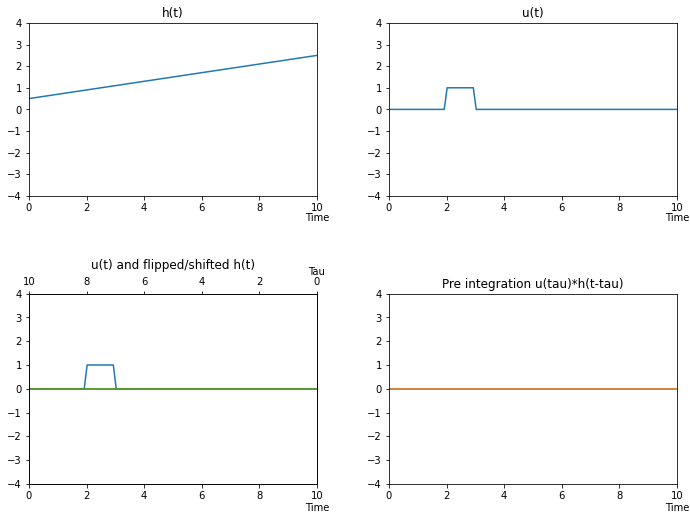

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import animation


# Function settings
startTime = 0
endTime = 10
amountOfTimeSteps = 100
timeStepsPerSecond = amountOfTimeSteps/(endTime - startTime)

# Animation settings (animationStartTau must be larger than animationEndTau)
animationStartTau = 10
animationEndTau = 3



# The defined h function, modify as desired by the user
def h(t):
    # Returns a line on form y = at + b
    return  0.5 + 0.2*t 

# The defined u function
def u(time):
    # Defined a box-function that jumps at tau and goes back to zero at time = tau+1
    tau = 2
    def boxFunction(t):
        temp = []
        for element in t:
            if element <= tau + 1 and element >= tau:
                temp.append(1)
            else:
                temp.append(0)
        return temp

    # Return the box-function
    return boxFunction(time)


# Flip the inputfunction
def flip(inputFunction):
    return inputFunction[::-1]    

# Shifts inputfunction a given timeShift
def shift(inputFunction, timeShift):
    # Find the startindex for the shift and make all previous elements zero
    startIndex = int(timeStepsPerSecond*timeShift)
    shiftedList = [0 for i in range(startIndex)]
    
    # Append the function to the shifted list
    for i in range(amountOfTimeSteps-startIndex):
        shiftedList.append(inputFunction[i])
    return shiftedList



# Everything in here is fine tuned
# Hence changing numerical values in here might
# Make the animation break
def runConvolutionAnimation():
    global animationStartTau, animationEndTau
    # Ensures that the values are within the function domain
    animationEndTau = max(animationEndTau, startTime)
    animationStartTau = min(animationStartTau, endTime)

    # Create the u and h function, flip/shifted h and the pre_integrated values
    time = np.linspace(startTime,endTime, amountOfTimeSteps)
    h_values = h(time)
    u_values = u(time)
    h_shift_and_flip_values = flip(shift(h_values, 2))
    np.asarray(u_values) * np.asarray(h_shift_and_flip_values)

    # Create figure and axes, dont touch these numbers, fine tuned
    fig = plt.figure(figsize=(10,8))
    h_ax = plt.axes([0.05, 0.6, 0.4, 0.3])
    u_ax = plt.axes([0.55, 0.6, 0.4, 0.3])
    h_u_flix_ax = plt.axes([0.05, 0.1, 0.4, 0.33])
    h_u_pre_integration_ax = plt.axes([0.55, 0.1, 0.4, 0.33])

    # Plot h
    plt.axes(h_ax)
    plt.title("h(t)")
    plt.xlabel("Time")
    plt.xlim(startTime,endTime)
    plt.ylim(-4, 4)
    plt.plot(time, h_values)
    ax = plt.gca()
    ax.xaxis.set_label_coords(1, -0.1)


    # Plot u
    plt.axes(u_ax)
    plt.title("u(t)")
    plt.xlim(startTime,endTime)
    plt.xlabel("Time")
    plt.ylim(-4,4)
    plt.plot(time, u_values)
    ax = plt.gca()
    ax.xaxis.set_label_coords(1, -0.1)

    # Plot u with flipped h
    plt.axes(h_u_flix_ax)
    plt.title("u(t) and flipped/shifted h(t)", y = 1.1)
    plt.xlim(startTime,endTime)
    plt.xlabel("Time")
    plt.ylim(-4,4)
    plt.plot(time, u_values)
    flippedAx = plt.gca()
    ax = plt.gca()
    ax.xaxis.set_label_coords(1,-0.1)

    # Create a secondary axis for time
    h_u_flip_ax_second = h_u_flix_ax.twiny()
    h_u_flip_ax_second.set_xlim(endTime,startTime)
    plt.xlabel("Tau")
    ax = plt.gca()
    ax.xaxis.set_label_coords(1,1.1)


    # Plot h and u pre integration
    plt.axes(h_u_pre_integration_ax)
    plt.title("Pre integration u(tau)*h(t-tau)")
    plt.xlabel("Time")
    plt.xlim(startTime,endTime)
    plt.ylim(-4,4)
    pre_integration_axis = plt.gca()
    pre_integration_axis.xaxis.set_label_coords(1, -0.1)

    # Initial state of the animation
    def initAnimation():
        h_shift_and_flip_values = flip(shift(h_values, animationStartTau))
        pre_integration_values = np.asarray(u_values) * np.asarray(h_shift_and_flip_values)
        h_shift_flip_animation, = flippedAx.plot(time, h_shift_and_flip_values)
        pre_integration_animation, = pre_integration_axis.plot(time, pre_integration_values)
        return [h_shift_flip_animation,pre_integration_animation]

    # The state of the functions at iteration i
    def animate(i):
        h_shift_and_flip_values = flip(shift(h_values, animationStartTau - i))
        pre_integration_values = np.asarray(u_values) * np.asarray(h_shift_and_flip_values)
        h_shift_flip_animation, = flippedAx.plot(time, h_shift_and_flip_values)
        pre_integration_animation, = pre_integration_axis.plot(time, pre_integration_values)
        return [h_shift_flip_animation, pre_integration_animation]

    # Running the animation
    anim = animation.FuncAnimation(fig, animate, init_func=initAnimation, frames=animationStartTau-animationEndTau, interval=200, blit=True, repeat_delay=1000)


    plt.show()

runConvolutionAnimation()
